In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from utils.eda import *

In [2]:
data = read_data()

In [3]:
## replace "?"
data = NativeCountry_classify(data)
data = WorkClass_replace(data)
data = Occupation_replace(data)

In [4]:
# remove related columns
data = Education_remove(data)
data = Status_conclude(data)
data = Capital_classify(data)
data = EducationNum_classify(data)
data = HoursPerWeek_classify(data)
data = Age_classify(data)

In [5]:
X, y, weight = get_X_y(data)
X = X_to_dummy(X, ["WorkClass", "Occupation", "Race", "Gender", "EducationNum", "Age", "HoursPerWeek"])

In [6]:
import prince

mca = prince.MCA(
    n_components=2, 
    n_iter=3,
    copy=True, 
    check_input=True, 
    engine='auto',
    random_state=42
)

mca = mca.fit(X)
print(mca.transform(X))

              0         1
0     -0.413782  0.848843
1     -0.561180  0.167700
2      0.068535 -0.581082
3      0.200179 -0.697571
4      0.098529  0.570544
...         ...       ...
32556  0.478202  0.198891
32557 -0.107004 -0.518131
32558  0.356664  0.268285
32559  0.756882  0.115282
32560 -0.634461  0.396087

[32561 rows x 2 columns]


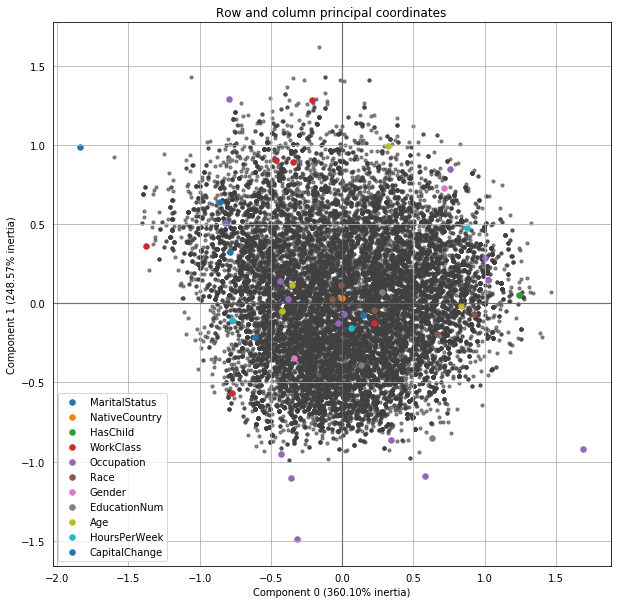

In [7]:
ax = mca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(10, 10),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)
plt.show()

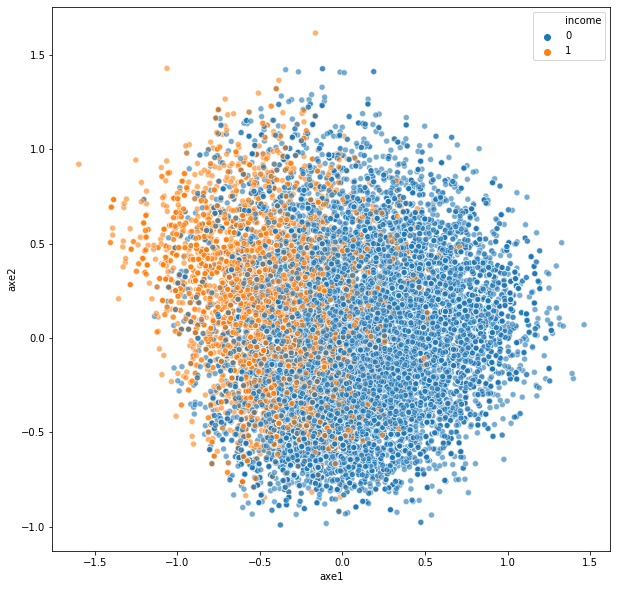

In [8]:
new_X = mca.transform(X)
df = pd.concat( [new_X, y], axis=1 )
df.columns = ['axe1','axe2', 'income']
plt.figure(figsize=(10,10))
sns.scatterplot(x="axe1", y="axe2", hue="income", data=df, alpha=.6)
plt.show()